In [337]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow_probability.substrates import numpy as tfp
tfd = tfp.distributions

In [515]:
def haar_phi(x):
    return np.ones_like(x) * ((x >= 0) & (x <=1))

def haar_psi(x):
    return ((x >= 0) & (x <=1)) * 1.0 * ((x < 0.5) * 1.0 - (x >= 0.5) * 1.0)

def eval_haar_basis(x, j1):    
    j_range = np.arange(j1 + 1).astype(float)
    kk = []
    jj = []
    for j in j_range:
        kk.append(np.arange(2 ** j))
        jj.append(np.ones(int(2 ** j)) * j)
    kk = np.concatenate(kk)
    jj = np.concatenate(jj)
    
    #kk = np.tile(ks, (len(j_range), 1))
    #jj = np.tile(j_range.reshape(-1, 1), len(ks))
    
    out = np.zeros(len(jj) + 1)
    out[:1] = haar_phi(x)
    out[1:] = (2 ** (jj / 2) * haar_psi((2 ** jj) * x - kk))
    return out

In [633]:
np.var(data)

0.1135823

In [634]:
2 / 50

0.04

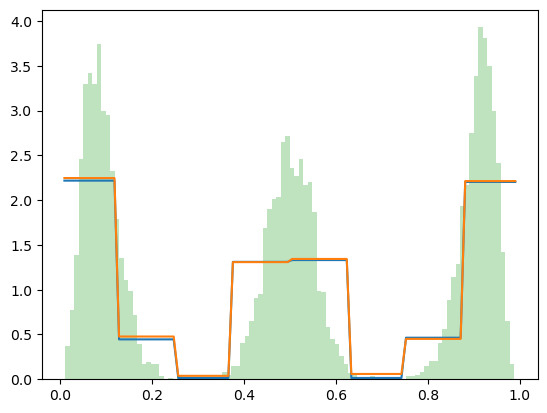

In [631]:
data = np.concatenate([
    tfd.Beta(5, 50).sample(2000),
    tfd.Beta(50, 50).sample(2000),
    tfd.Beta(50, 5).sample(2000)])

haar_evals = []
j1 = 2
for x in data:
    haar_evals.append(eval_haar_basis(x, j1))
    
haar_evals = np.stack(haar_evals)
    
xgrid = np.linspace(0.01, 0.99, 100)

#coeffs = np.mean(haar_evals + tfd.Laplace(0, 0.1).sample(haar_evals.shape), axis=0)
coeffs1 = np.mean(haar_evals, axis=0)

sanitized_data = haar_evals + tfd.Laplace(0, 0.5).sample(haar_evals.shape)
coeffs2 = np.mean(sanitized_data, axis=0)
dens1 = np.zeros_like(xgrid)
dens2 = np.zeros_like(xgrid)

for i, x in enumerate(xgrid):
    dens1[i] = np.dot(coeffs1, eval_haar_basis(x, j1))
    dens2[i] = np.dot(coeffs2, eval_haar_basis(x, j1))
    
    
plt.plot(xgrid, dens1)
plt.plot(xgrid, dens2)

plt.hist(data, density=True, alpha=0.3, bins=100)
plt.show()

In [617]:
xgrid = np.linspace(0, 1, 5000)

haar_basis = []
for x in xgrid:
    haar_basis.append(eval_haar_basis(x, j1))
    
haar_basis = np.stack(haar_basis).T

In [618]:
idx=0
data[idx]

0.114215806

In [619]:
beval = np.abs(eval_haar_basis(0.51721, j1))
print(beval[-int(2**j1):])
best_base = np.argmax(beval[-int(2**j1):]) + len(haar_evals[idx, :]) - int(2**j1)
best_base

[0. 0. 2. 0.]


6

In [620]:
len(beval)

8

In [621]:
k = np.argmax(beval[-int(2**j1):])

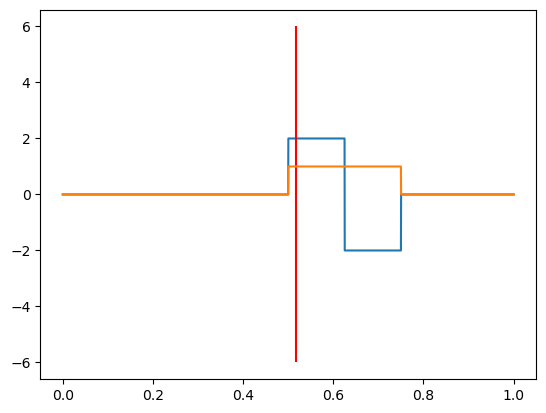

In [622]:
plt.plot(xgrid, haar_basis[best_base, :])
plt.vlines(0.51721, -6, 6, color="red")
#plt.title(haar_evals[idx, best_base)
wh1 = (xgrid  > k * 2 ** (-j1))
wh2 = xgrid < (k + 1) * 2 ** (-j1)
plt.plot(xgrid,  wh1 & wh2)

In [640]:
j = 10
k = 220

u = 2**(-j)*(k+1)
l = 2**(-j)*(k)
u - (u-l) / 2

0.21533203125

In [641]:
2 ** (-j) * k + 2**(-j -1)

0.21533203125

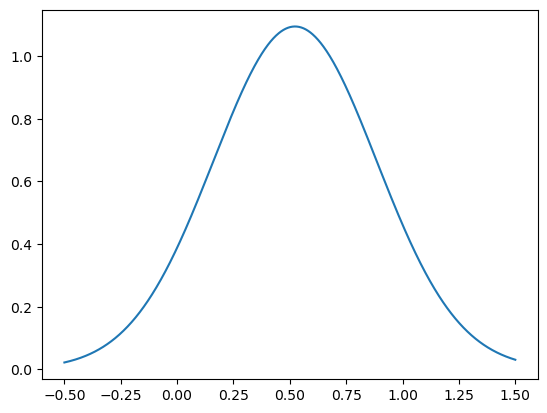

In [628]:
xgrid = np.linspace(-0.5, 1.5, 1000)
eval_dens = np.loadtxt("wavelets/out/ndata_250_eps_0.100000_j_4_rep_0_eval_dens.csv", delimiter=",")

plt.plot(xgrid, np.mean(np.exp(eval_dens), axis=0))

In [594]:
aa = np.argsort(beval[-(2**j1):])[::-1]
k = aa[0]

In [595]:
basis_idx =  2 ** (j1+1) - (2 ** j1) + k
basis_idx

56

24

In [ ]:
x > k * 2 ** j1 & x < (k+1) 

In [579]:
k

24

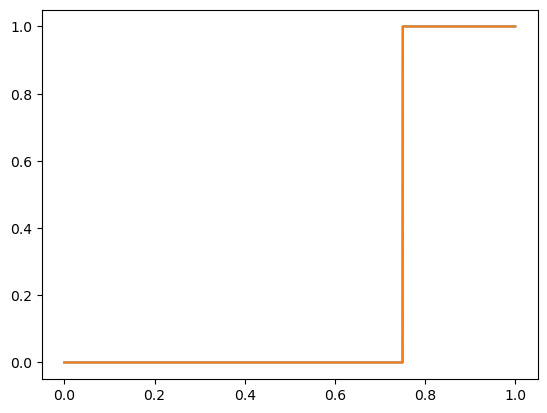

In [582]:
plt.plot(xgrid, ((2 ** (j1) * xgrid )) > k)
plt.plot(xgrid, xgrid  > k * (2 ** (-j1)))

Text(0.5, 1.0, '-5.656854249492381')

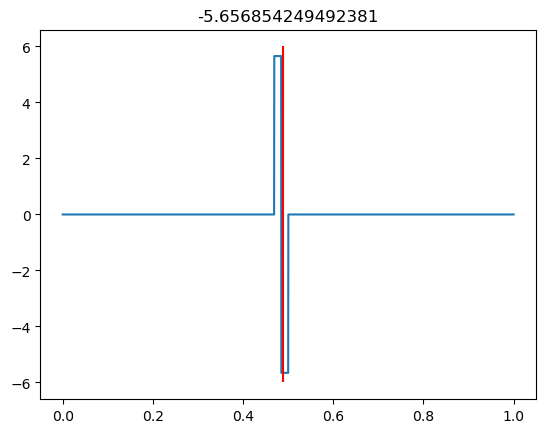

In [537]:
idx = 2502
beval = np.abs(haar_evals[idx, :])
best_base = np.argsort(beval[-int(2**j1):])[::-1] + len(haar_evals[idx, :]) - int(2**j1)
plt.plot(xgrid, haar_basis[best_base[0], :])
plt.vlines(data[idx], -6, 6, color="red")
plt.title(haar_evals[idx, best_base[0]])

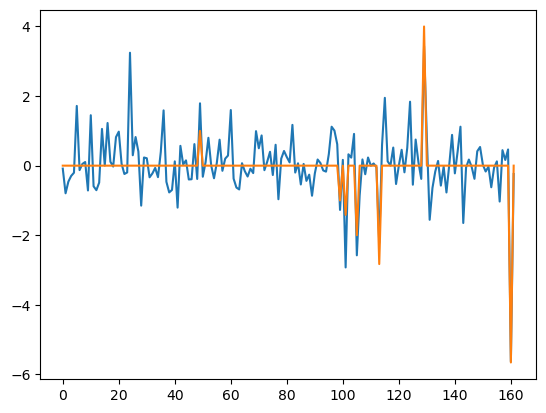

In [464]:
plt.plot(sanitized_data[idx, 1:])
plt.plot(haar_evals[idx, 1:])

In [326]:
coeffs1 = np.loadtxt("wavelets/out/coeffs1.csv", delimiter=",")
coeffs2 = np.loadtxt("wavelets/out/coeffs2.csv", delimiter=",")
basis_evals = np.loadtxt("wavelets/out/basis_evals.csv", delimiter=",")

In [327]:
coeffs1.shape

(64,)

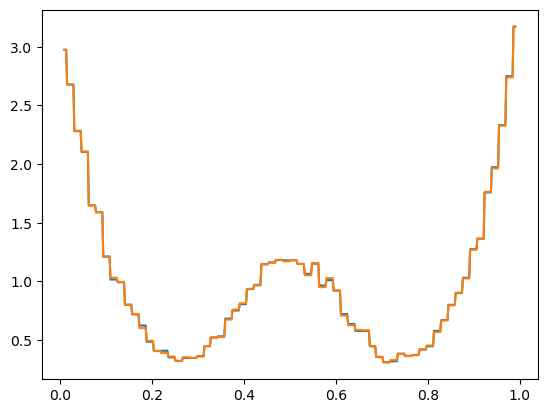

In [328]:
xgrid = np.linspace(0.01, 0.99, 500)
dens1 = np.zeros_like(xgrid)
dens2 = np.zeros_like(xgrid)

for i, x in enumerate(xgrid):
    dens1[i] = np.dot(coeffs1, basis_evals[:, i])
    dens2[i] = np.dot(coeffs2, basis_evals[:, i])
    
plt.plot(xgrid, dens1)
plt.plot(xgrid, dens2)

In [293]:
np.sum(np.abs(basis_evals[-11:, :]), axis=1)

array([  0.     ,   0.     ,   0.     ,   0.     ,   0.     , 166.87737,
       181.01952, 178.19109, 181.01952, 181.01952, 178.19109])

k: 1 --> 250.0
k: 2 --> 250.0
k: 3 --> 0.0
k: 4 --> 0.0
k: 5 --> 0.0
k: 6 --> 0.0
k: 7 --> 0.0
k: 8 --> 0.0
k: 9 --> 0.0
k: 10 --> 0.0
k: 11 --> 0.0
k: 12 --> 0.0
k: 13 --> 0.0
k: 14 --> 0.0
k: 15 --> 0.0
k: 16 --> 0.0
k: 17 --> 0.0
k: 18 --> 0.0
k: 19 --> 0.0
k: 20 --> 0.0


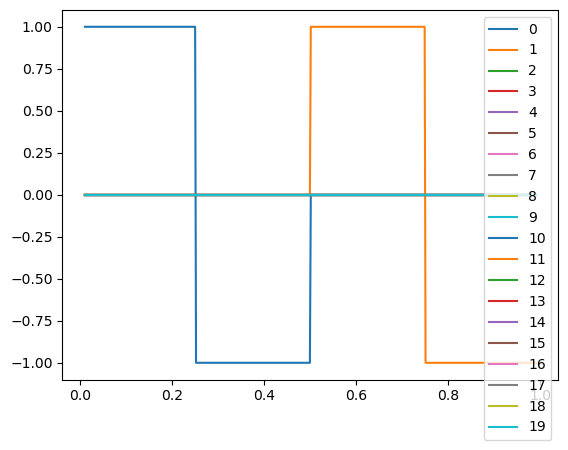

In [307]:
xgrid = np.linspace(0.01, 0.99, 500)
j = 1
for k in range(0, 20):
    print("k: {0} --> {1}".format(k+1, np.sum(np.abs(haar_psi(2 ** j *  xgrid - k)))))
    plt.plot(xgrid, haar_psi(2 ** j *  xgrid - k), label=k)
    
plt.legend()

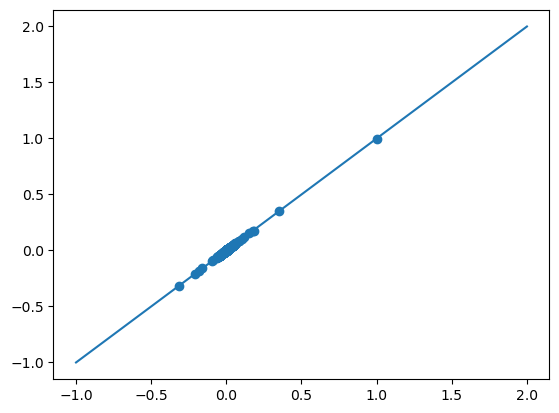

In [180]:
plt.scatter(np.mean(haar_evals, axis=0), 
            np.mean(haar_evals + tfd.Laplace(0, 0.1).sample(haar_evals.shape), axis=0))

aa = np.linspace(-1, 2, 100)
plt.plot(aa, aa)

In [650]:
a = 50
b = 50

y = tfd.Beta(a, b).sample(5000)

alpha = 1
beta = 1

beta_p = beta - np.sum(np.log(y))
alpha_p = alpha + len(y)
alpha_p / beta_p

1.434684246625857